# Explore dataset

## Download icons dataset

Downloads data using Kaggle API

In [1]:
import kaggle
from definitions import *

In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_name, path=raw_data_dir, unzip=True, quiet=False)

  0%|          | 0.00/559M [00:00<?, ?B/s]

  2%|▏         | 12.0M/559M [00:03<02:21, 4.04MB/s]


KeyboardInterrupt: 

Copy data from downloaded dirs into dirs named as labels

In [3]:
# work in progres - above steps
from definitions import * #if you already loaded the data
import os, shutil

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
            
dirToRemove = 'kaggle_bee_vs_wasp' 
fullDirToRemove = os.path.join(raw_data_dir, dirToRemove)

if os.path.exists(fullDirToRemove):
    finalLabels = ['bee', 'wasp', 'other_insect', 'other_noinsect']
    for fLabel in finalLabels:
        dir = os.path.join(raw_data_dir,fLabel)
        if not os.path.exists(dir):
            os.mkdir(dir)
    currentLabels = [['bee1', 'bee2'], ['wasp1', 'wasp2'], ['other_insect'], ['other_noinsect']]
    for i in range(len(finalLabels)): #copy images 
        for cL in currentLabels[i]:
            source = os.path.join(fullDirToRemove, cL)
            destination = os.path.join(raw_data_dir, finalLabels[i])
            copytree(source, destination)
    #copy label.csv file
    labelFile =  os.path.join(fullDirToRemove, 'labels.csv')   
    shutil.copy2(labelFile, raw_data_dir)
    # os.remove(fullDirToRemove) # commented out as it generates problem with acces to dir
    

Update labels.csv (get rid of '1' and '2' in dir names)

In [2]:
import pandas as pd
import os
from definitions import * #if you already loaded the data
labelFile =  os.path.join(raw_data_dir, 'labels.csv')  
if os.path.exists(labelFile):
    labels = pd.read_csv(labelFile)
    #print(labels['path'].values)
    paths = labels['path'].values
    convertedPaths = []
    for path in paths:
        path = path.replace('bee1', 'bee')
        path = path.replace('bee2', 'bee')
        path = path.replace('wasp1', 'wasp')
        path = path.replace('wasp2', 'wasp')
        convertedPaths.append(path)
    labels['path'] = convertedPaths
    labels.to_csv(labelFile, header = True, index = False)

## Analize dataset's files

Get labels from dataset directory

In [3]:
import os

labels = [f.name for f in os.scandir(raw_data_dir) if f.is_dir()]

In [4]:
labels

['bee', 'other_insect', 'other_noinsect', 'wasp']

Create list of all images in dataset

In [5]:
files = []
for label in labels:
    label_dir = os.path.join(raw_data_dir, label)
    files += [os.path.join(label_dir, f.name) for f in os.scandir(label_dir) if f.is_file()]

# Remove not images from dataset
not_jpg = [f for f in files if not f.endswith(".jpg")]
print(len(files))
files = [file for file in files if file not in not_jpg]

11421


In [6]:
print(len(files))

11420


Shuffle files

In [7]:
import random

random.shuffle(files)

### Show sample images

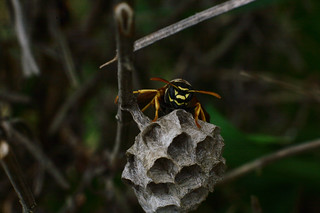

In [8]:
import IPython.display as display

for _ in range(3):
    image_path = random.choice(files)
    display.display(display.Image(image_path))

## Find duplicated images

In [9]:
from collections import Counter

# Find images that are present in multiple labels
fnames = [file.split("\\")[-1] for file in files]

duplicated_names = [(name, count) for name, count in Counter(fnames).items() if count > 1]
duplicated_names = sorted(duplicated_names, key=lambda x: x[1], reverse=True)

print(len(duplicated_names))
duplicated_names[:15]

7


[('9679170523_ea3750e1a1_w.jpg', 2),
 ('30115964458_3710c2a4cb_n.jpg', 2),
 ('4591255979_0457e00e7f_n.jpg', 2),
 ('26888643508_2f915e650e_n.jpg', 2),
 ('2827307690_9487370a0c_n.jpg', 2),
 ('40465916291_d4ee8d42f2_n.jpg', 2),
 ('5812799997_745d664c47_n.jpg', 2)]

## Get list of images sizes 
(**This may take several minutes**)

In [10]:
from PIL import Image

i = 0
limit = 20000 # Set limit to speed it up
images_sizes = Counter()
for i, image_path in enumerate(files[:limit]):
    with Image.open(image_path) as img:
        images_sizes[img.size] += 1 # (width, height)
    if (i + 1) % (limit // 100) == 0:
        print("\rProcessed %d out of %d images" % (i + 1, limit), end="")
        
images_sizes.most_common(100)

Processed 11400 out of 20000 images

[((640, 640), 2707),
 ((320, 240), 1392),
 ((319, 213), 819),
 ((180, 300), 714),
 ((240, 240), 390),
 ((320, 213), 382),
 ((400, 267), 369),
 ((640, 427), 200),
 ((640, 480), 191),
 ((320, 214), 176),
 ((180, 240), 169),
 ((400, 266), 98),
 ((160, 240), 98),
 ((400, 225), 97),
 ((320, 256), 83),
 ((320, 212), 83),
 ((500, 375), 69),
 ((480, 640), 67),
 ((320, 229), 47),
 ((320, 241), 44),
 ((640, 426), 39),
 ((400, 268), 34),
 ((320, 226), 29),
 ((320, 215), 29),
 ((320, 233), 28),
 ((319, 214), 28),
 ((320, 228), 26),
 ((640, 428), 25),
 ((320, 235), 25),
 ((320, 216), 24),
 ((320, 220), 24),
 ((320, 211), 24),
 ((320, 210), 23),
 ((320, 243), 23),
 ((320, 245), 23),
 ((320, 242), 22),
 ((319, 228), 22),
 ((320, 244), 22),
 ((400, 250), 21),
 ((400, 265), 20),
 ((320, 227), 20),
 ((192, 240), 20),
 ((399, 266), 20),
 ((240, 192), 20),
 ((320, 239), 19),
 ((320, 247), 19),
 ((320, 230), 19),
 ((320, 231), 19),
 ((320, 221), 18),
 ((320, 218), 18),
 ((427, 640), 18),
 ((320, 237), 18),

## Count images for each label 

In [11]:
images_count_org = Counter()

for file in files:
    label = file.split("\\")[-2]
    name = file.split("\\")[-1]
    
    images_count_org[label] += 1

In [12]:
print(images_count_org)

Counter({'wasp': 4942, 'bee': 3183, 'other_insect': 2439, 'other_noinsect': 856})


In [13]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

count_data = []
for label, org_count in dict(images_count_org).items():
    count_data.append((label, org_count, org_count))
    
count_data = sorted(count_data, reverse=True, key=lambda x: x[2])
labels, org_count, sum_count = zip(*count_data)

trace_org = go.Bar(
    x=labels,
    y=org_count,
    name='Orginal images count'
)

data = [trace_org]
layout = go.Layout(
    barmode='stack',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Concluston ###
 Should we augment mostly other_insects  and bee as these image sets ae smaller than wasps? 

